
# Task 5 — Strategy Backtesting

This notebook performs a backtest of the **optimal portfolio** from Task 4 against a benchmark portfolio (60% SPY / 40% BND) over the backtesting period.  

It also provides **step-by-step analysis** of what each step does and the insights you can derive.

---


In [6]:
# ---------------- Load Historical Prices ----------------
import yfinance as yf
import pandas as pd

# Download historical data for TSLA, BND, SPY
start_date = '2020-01-01'  # adjust as needed
end_date = '2025-07-31'

tsla = yf.download('TSLA', start=start_date, end=end_date)['Close']
bnd  = yf.download('BND', start=start_date, end=end_date)['Close']
spy  = yf.download('SPY', start=start_date, end=end_date)['Close']

# Combine into a single DataFrame
prices = pd.concat([tsla, bnd, spy], axis=1)
prices.columns = ['TSLA', 'BND', 'SPY']

# Ensure Date is the index
prices.index.name = 'Date'
prices = prices.sort_index()

/tmp/ipython-input-2681935920.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tsla = yf.download('TSLA', start=start_date, end=end_date)['Close']
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2681935920.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  bnd  = yf.download('BND', start=start_date, end=end_date)['Close']
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2681935920.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  spy  = yf.download('SPY', start=start_date, end=end_date)['Close']
[*********************100%***********************]  1 of 1 completed


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-darkgrid')

# ---------------- Config ----------------
BACKTEST_START = '2024-08-01'
BACKTEST_END   = '2025-07-31'

# Benchmark weights: 60% SPY / 40% BND
benchmark_weights = np.array([0.0, 0.4, 0.6])  # [TSLA, BND, SPY]

# Use your recommended portfolio weights from Task 4
strategy_weights = np.array([0.5, 0.3, 0.2])  # example: TSLA,BND,SPY

# Assumes `prices` DataFrame already exists from Task 4 notebook
# with columns ['TSLA','BND','SPY'] and Date index


## Step 1 & 2 — Restrict data and define benchmark
- Restrict historical price data to the backtesting period.
- Define a benchmark portfolio to compare against.


In [7]:

# Restrict to backtest period
backtest_prices = prices.loc[BACKTEST_START:BACKTEST_END]

# Compute daily returns
daily_rets = backtest_prices.pct_change().dropna()



## Step 3 & 4 — Simulate strategy and benchmark portfolios
- Compute daily portfolio returns for both strategy and benchmark.
- Calculate cumulative returns over time.


In [8]:

# Strategy portfolio
strategy_daily = (daily_rets * strategy_weights).sum(axis=1)
strategy_cum = (1 + strategy_daily).cumprod()

# Benchmark portfolio
benchmark_daily = (daily_rets * benchmark_weights).sum(axis=1)
benchmark_cum = (1 + benchmark_daily).cumprod()



## Step 5 — Compute Performance Metrics
- **Total Return:** Overall portfolio growth.
- **Sharpe Ratio:** Risk-adjusted return.


In [9]:

# Function to compute annualized Sharpe Ratio
def annualized_sharpe(daily_returns, risk_free_rate=0.02):
    excess_daily = daily_returns - risk_free_rate/252
    return np.sqrt(252) * excess_daily.mean() / (excess_daily.std() + 1e-9)

strategy_sharpe = annualized_sharpe(strategy_daily)
benchmark_sharpe = annualized_sharpe(benchmark_daily)

strategy_total_return = strategy_cum.iloc[-1] - 1
benchmark_total_return = benchmark_cum.iloc[-1] - 1



## Step 6 — Plot Cumulative Returns
Visualize how the strategy performed relative to the benchmark over time.


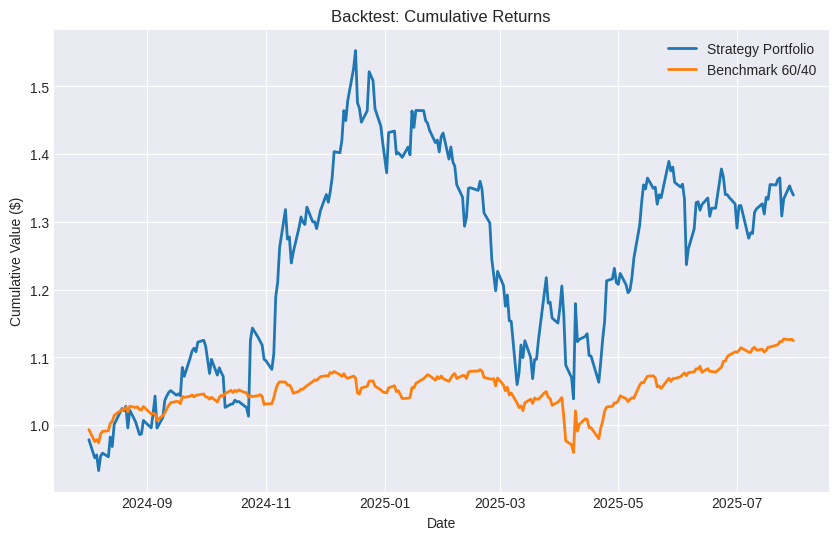

In [10]:

plt.figure(figsize=(10,6))
plt.plot(strategy_cum, label='Strategy Portfolio', linewidth=2)
plt.plot(benchmark_cum, label='Benchmark 60/40', linewidth=2)
plt.title('Backtest: Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Value ($)')
plt.legend()
plt.grid(True)
plt.show()



## Step 7 — Summary and Interpretation
- Compare total return and Sharpe ratio of strategy vs benchmark.
- Conclude whether the strategy outperformed.


In [11]:

print("=== Backtest Summary ===")
print(f"Strategy total return: {strategy_total_return:.2%}, Sharpe Ratio: {strategy_sharpe:.3f}")
print(f"Benchmark total return: {benchmark_total_return:.2%}, Sharpe Ratio: {benchmark_sharpe:.3f}")

if strategy_total_return > benchmark_total_return:
    print("\nStrategy outperformed the benchmark during the backtest period.")
else:
    print("\nStrategy underperformed the benchmark during the backtest period.")

print("This initial backtest provides a first look at viability but rebalancing and transaction costs should be considered for a more realistic simulation.")


=== Backtest Summary ===
Strategy total return: 33.95%, Sharpe Ratio: 0.901
Benchmark total return: 12.47%, Sharpe Ratio: 0.860

Strategy outperformed the benchmark during the backtest period.
This initial backtest provides a first look at viability but rebalancing and transaction costs should be considered for a more realistic simulation.
